# Exercise: Derivatives

- by Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from jupyterthemes import jtplot
jtplot.style()

### Load data

In [2]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [3]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

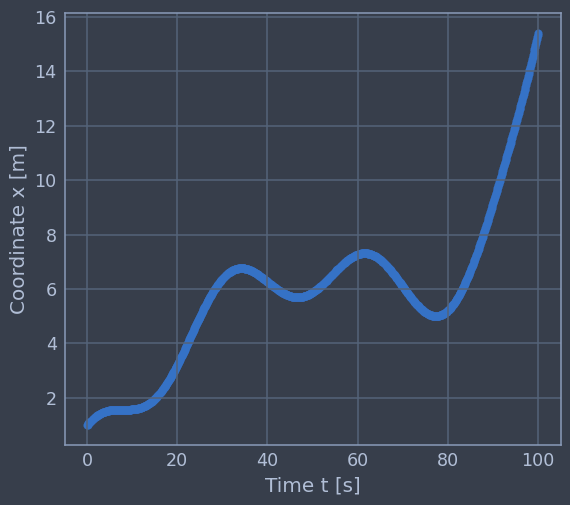

In [4]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity \\(v(t)=\dot{x}(t)\\) and the acceleration \\(a(t)=\ddot{x}(t)\\) for the loaded data set that describes a set of points \\((t_i,x_i)\\) for \\(i=0,\dots,1000\\).

1. Calculate \\(v_i\\) and \\(a_i\\) using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function \\(x(t)\\) but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

In [5]:
data[:,1]

array([ 1.        ,  1.01980001,  1.03920011, ..., 15.25565932,
       15.33160759, 15.40808206])

In [6]:
def forward(data):
    derive = np.zeros(len(data[:,1]))
    # for equidistant data
    # h = (data[1,0]-data[0,0])
    # velocity[:-1] = (data[1:,1]-data[:-1,1])/h
    # derive[:-1] means all points except last one
    # general
    derive[:-1] =(data[1:,1]-data[:-1,1]) / (data[1:,0]-data[:-1,0])
    # Last value use backwards method (or just set to second last value)
    #derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0], derive])
    

In [7]:
velocityForward = forward(data)
accelerationForward = forward(forward(data))

In [8]:
def central(data):
    derive = np.zeros(len(data[:,1]))
    derive[1:-1] = (data[2:,1]-data[:-2,1]) / (data[2:,0]-data[:-2,0])
    #first value use forward method
   # derive[0] = (data[1,1]-data[0,1]) / (data[-1,0]-data[0,0])
    # last value use backward method
  #  derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0], derive])

In [9]:
velocityCentral = central(data)
accelerationCentral = central(central(data))

In [10]:
def Richardson(data):
    derive = np.zeros(len(data[:,1]))
    derive[2:-2] = (-data[4:,1] + 8*data[3:-1,1] - 8*data[1:-3,1] + data[:-4,1]) / (12*(data[3:-1,0]-data[2:-2,0]))
    # first values
  #  derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
  #  derive[1] = (data[2,1]-data[1,1]) / (data[2,0]-data[1,0])
    # last values
   # derive[-2] = (data[-2,1]-data[-3,1]) / (data[-1,0]-data[-3,0])
   # derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [11]:
velocityRichardson = Richardson(data)
accelerationRichardson = Richardson(Richardson(data))

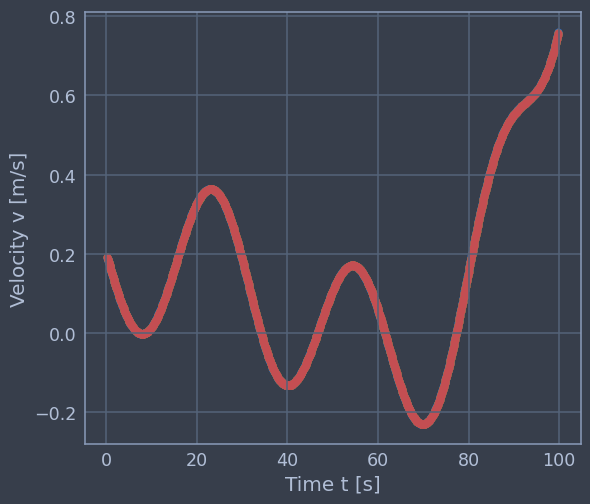

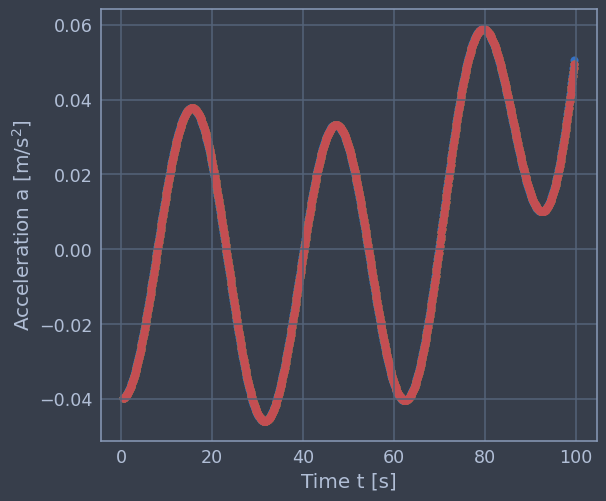

In [17]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[2:-2,0],velocityForward[2:-2,1])
plt.scatter(velocityCentral[2:-2,0],velocityCentral[2:-2,1])
plt.scatter(velocityRichardson[2:-2,0], velocityRichardson[2:-2,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[4:-4,0],accelerationForward[4:-4,1])
plt.scatter(accelerationCentral[4:-4,0],accelerationCentral[4:-4,1])
plt.scatter(accelerationRichardson[4:-4,0],accelerationRichardson[4:-4,1])
plt.show()